In [1]:
# Auto reload library
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
import pandas as pd
from os import path
from data import process_raw_data

## Raw data processing

In [4]:
raw_data = pd.read_csv("data/raw_data.csv")

In [18]:
data = process_raw_data(raw_data)

/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


[*********************100%***********************]  1 of 1 completed


/Users/shawn/Desktop/DL_Final_Project/data/util.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500["sp500_return"] = sp500["sp500"] / sp500["sp500"].shift(1) - 1
/Users/shawn/Desktop/DL_Final_Project/data/util.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500["sp500_log_return"] = np.log(sp500["sp500"] / sp500["sp500"].shift(1))


[*********************100%***********************]  1 of 1 completed


In [19]:
data.head()
print(data.shape[0], "unique records with", data.shape[1], "fields.")
print("Date ranges between ", data.date.min(), "and", data.date.max(), "with", len(data.date.unique()), "unique days.")
print("Total of", len(data.optionid.unique()), "unique options. On average, each option has", data.groupby("optionid").size().mean(), "records.")
data.tail()

19065275 unique records with 20 fields.
Date ranges between  1998-06-17 00:00:00 and 2020-11-25 00:00:00 with 5650 unique days.
Total of 396207 unique options. On average, each option has 48.119480473590826 records.


,optionid,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,delta,gamma,vega,theta,impl_volatility,time_to_maturity,ttm_yr,impvol_chg,spot,spot_return,VIX
19065270,137169491.0,2020-11-25,2021-05-21,P,3910.0,359.2,361.2,0,0,-0.744359,0.000783,794.7902,-167.6260,0.159707,177,0.702381,-0.003654,3629.649902,-0.001586,21.25
19065271,137182317.0,2020-11-25,2021-01-15,C,3835.0,18.7,19.1,1,2,0.171276,0.001201,341.3152,-187.5345,0.157448,51,0.202381,-0.003536,3629.649902,-0.001586,21.25
19065272,137182318.0,2020-11-25,2021-01-15,P,3835.0,225.9,228.8,0,0,-0.845438,0.001199,316.3231,-210.7087,0.146218,51,0.202381,-0.008534,3629.649902,-0.001586,21.25
19065273,137182319.0,2020-11-25,2021-05-21,C,3920.0,59.8,60.8,0,0,0.252413,0.000755,802.1127,-126.5368,0.167289,177,0.702381,-0.002165,3629.649902,-0.001586,21.25
19065274,137182320.0,2020-11-25,2021-05-21,P,3920.0,366.4,368.4,0,0,-0.752907,0.000773,779.9620,-164.8891,0.158856,177,0.702381,-0.003665,3629.649902,-0.001586,21.25


In [ ]:
data.to_csv("data/research_data.csv", index=False)

## Dataset Exploration and Feature Creation

In [3]:
data = pd.read_csv("data/raw_data.csv")
print(data.shape[0], "unique records with", data.shape[1], "fields.")
print("Date ranges between ", data.date.min(), "and", data.date.max(), "with", len(data.date.unique()), "unique days.")
print("Total of", len(data.optionid.unique()), "unique options. On average, each option has", data.groupby("optionid").size().mean(), "records.")
data.tail()

5208642 unique records with 19 fields.
Date ranges between  1996-01-04 and 2020-12-30 with 6292 unique days.
Total of 132409 unique options. On average, each option has 39.337522373856764 records.


,Unnamed: 0,optionid,date,time_to_maturity,strike_price,best_bid,best_offer,open_interest,delta,gamma,vega,theta,spot,spot_return,VIX,impl_volatility,ttm_yr,optionid_chg,impvol_chg
5208637,9635448,135757541,2020-11-03,409.0,3975.0,63.3,67.1,30.0,0.196262,0.000423,978.8297,-70.46168,3369.159912,0.017643,35.549999,0.182589,1.623016,0.0,0.007816
5208638,9643318,135757541,2020-11-04,408.0,3975.0,61.0,90.1,30.0,0.221022,0.000456,1071.0920,-74.41212,3443.439941,0.021808,29.570000,0.177826,1.619048,0.0,-0.026086
5208639,9650323,135757541,2020-11-05,407.0,3975.0,92.6,100.0,30.0,0.258562,0.000475,1186.9940,-84.07771,3510.449951,0.019273,27.580000,0.182156,1.615079,0.0,0.024350
5208640,9657695,135757541,2020-11-06,406.0,3975.0,89.4,93.0,57.0,0.252089,0.000480,1169.8420,-81.19736,3509.439941,-0.000288,24.860001,0.178211,1.611111,0.0,-0.021657
5208641,9665323,135757541,2020-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
if path.exists("data/features.csv"):
    data = pd.read_csv("data/features.csv")
else:
    data = data_process_records(data)
print(data.shape[0], "unique records with", data.shape[1], "fields.")
print("Date ranges between ", data.date.min(), "and", data.date.max(), "with", len(data.date.unique()), "unique days.")
print("Total of", len(data.optionid.unique()), "unique options. On average, each option has", data.groupby("optionid").size().mean(), "records.")
data.to_csv("data/features.csv", index=False)
data.tail()

5076232 unique records with 31 fields.
Date ranges between  1996-01-05 and 2020-12-30 with 6291 unique days.
Total of 125958 unique options. On average, each option has 40.30098921862843 records.


,date,optionid,iv,time_to_maturity,moneyness,moneyness_5,moneyness_20,VIX,VIX_5,VIX_20,...,delta_20,gamma,gamma_5,gamma_20,vega,vega_5,vega_20,theta,theta_5,theta_20
5076227,2020-11-02,135757541,0.181173,410.0,-705.040039,-650.917393,-583.771588,38.020000,36.115144,31.076176,...,0.215525,0.000378,0.000401,0.000425,838.0958,931.961944,1056.829770,-60.69715,-66.918732,-73.551509
5076228,2020-11-03,135757541,0.182589,409.0,-664.760010,-655.531599,-591.484771,37.130001,36.453430,31.652731,...,0.211201,0.000396,0.000399,0.000422,881.2830,915.068963,1040.111030,-63.12769,-65.655051,-72.558764
5076229,2020-11-04,135757541,0.177826,408.0,-605.840088,-638.967762,-592.851944,35.549999,36.152286,32.023900,...,0.209778,0.000423,0.000407,0.000422,978.8297,936.322542,1034.274713,-70.46168,-67.257261,-72.359042
5076230,2020-11-05,135757541,0.182156,407.0,-531.560059,-603.165194,-587.014622,29.570000,33.958191,31.790195,...,0.210849,0.000456,0.000423,0.000425,1071.0920,981.245695,1037.781121,-74.41212,-69.642214,-72.554573
5076231,2020-11-06,135757541,0.178211,406.0,-464.550049,-556.960146,-575.351329,27.580000,31.832127,31.389224,...,0.215393,0.000475,0.000441,0.000430,1186.9940,1049.828463,1051.991872,-84.07771,-74.454046,-73.652015


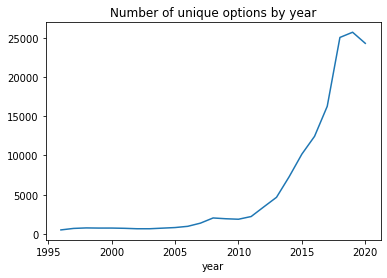

In [5]:
data['year'] = pd.DatetimeIndex(data["date"]).year
data.groupby('year')['optionid'].nunique().plot(title="Number of unique options by year")
data = data.drop(columns=['year'])

<AxesSubplot:title={'center':'Distribution of Implied Vol'}, ylabel='Frequency'>

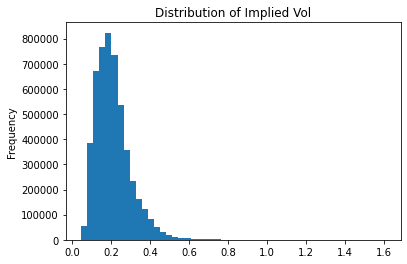

In [6]:
data.iv.plot.hist(bins=50, title = "Distribution of Implied Vol")

In [7]:
data.dtypes

date                   object
optionid                int64
iv                    float64
time_to_maturity      float64
moneyness             float64
moneyness_5           float64
moneyness_20          float64
VIX                   float64
VIX_5                 float64
VIX_20                float64
spread                float64
spread_5              float64
spread_20             float64
impl_volatility       float64
impl_volatility_5     float64
impl_volatility_20    float64
impvol_chg            float64
impvol_chg_5          float64
impvol_chg_20         float64
delta                 float64
delta_5               float64
delta_20              float64
gamma                 float64
gamma_5               float64
gamma_20              float64
vega                  float64
vega_5                float64
vega_20               float64
theta                 float64
theta_5               float64
theta_20              float64
dtype: object

## Modeling

In [14]:
import torch
from util import split_train_test, prep_mlp
from model import train_model, MLP

In [9]:
train, test = split_train_test(data, 0.9)
print(len(train.optionid.unique()), "training samples and", len(test.optionid.unique()), "testing samples.")

In [30]:
train_mlp = prep_mlp(train)
model_mlp = MLP(input_dim=train_mlp.X[0].shape[0])
train_model(data=train_mlp, model=model_mlp, debug=True)

Epoch 0, batch 0, loss: 0.21614187955856323
Epoch 0, batch 1000, loss: 0.05334790050983429
Epoch 0, batch 2000, loss: 0.050073958933353424
Epoch 0, batch 3000, loss: 0.0543060377240181
Epoch 0, batch 4000, loss: 0.0547628290951252
Epoch 1, batch 0, loss: 0.052172690629959106
Epoch 1, batch 1000, loss: 0.052575353533029556
Epoch 1, batch 2000, loss: 0.052891168743371964
Epoch 1, batch 3000, loss: 0.04971785843372345
Epoch 1, batch 4000, loss: 0.052300937473773956
Epoch 2, batch 0, loss: 0.05312366411089897
Epoch 2, batch 1000, loss: 0.051052577793598175
Epoch 2, batch 2000, loss: 0.05006301403045654
Epoch 2, batch 3000, loss: 0.05106394737958908
Epoch 2, batch 4000, loss: 0.05458313599228859
Epoch 3, batch 0, loss: 0.055205900222063065
Epoch 3, batch 1000, loss: 0.05399200692772865
Epoch 3, batch 2000, loss: 0.05367717891931534
Epoch 3, batch 3000, loss: 0.053488023579120636
Epoch 3, batch 4000, loss: 0.052854713052511215
Epoch 4, batch 0, loss: 0.05166931822896004
Epoch 4, batch 1000, 